In [91]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import distance
import re

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc,f1_score, recall_score, accuracy_score,precision_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, classification_report

from ingeniring_utils import * # import all existing functions from file cleaning.py
from modeling_utils import *

%load_ext autoreload
%autoreload 2


pd.set_option('display.max_columns', 360)


ModuleNotFoundError: No module named 'modeling_utils'

In [25]:
# Loading Data

df = pd.read_csv('data/df.csv')

In [37]:
target = new_df['compliance']

features = ['agency_name', 'disposition', 'discount_amount',
            'judgment_amount', 'Structure', 'Condition', 'Occupancy',
            'Needs_Boarding', 'Fire', 'Dumping', 'Units', 'crime_count']

numeric_features = ['discount_amount', 'judgment_amount', 'crime_count']

cat_features = ['agency_name', 'disposition', 'Structure', 'Condition', 
                 'Occupancy', 'Needs_Boarding', 'Fire', 'Dumping', 'Units']

In [7]:
numeric_var_analysis(df, numeric_features)


NameError: name 'numeric_var_analysis' is not defined

In [19]:
df.head()

,ticket_id,agency_name,disposition,discount_amount,judgment_amount,compliance,lon,lat,parcel_id,AddCombo,Structure,Condition,Occupancy,Needs_Boarding,Fire,Dumping,Units,coordinates,crime_count
0,22056,"Buildings, Safety Engineering & Env Department",Responsible by Default,0.0,305.0,0.0,-83.124350,42.390788,12004359,2900 TYLER,yes,poor,unoccupied,yes,yes,no,4+ units,"(42.390787911000096, -83.124350291)",4
1,27586,"Buildings, Safety Engineering & Env Department",Responsible by Determination,0.0,855.0,1.0,-83.135099,42.326928,20004897,4311 CENTRAL,yes,good,occupied,no,no,no,4+ units,"(42.3269276180001, -83.13509917499991)",1
2,18735,"Buildings, Safety Engineering & Env Department",Responsible by Default,0.0,140.0,0.0,-83.037736,42.388692,15014168,8228 MT ELLIOTT,yes,good,occupied,no,no,no,4+ units,"(42.388692329, -83.037735508)",0
3,18733,"Buildings, Safety Engineering & Env Department",Responsible by Default,0.0,140.0,0.0,-83.037736,42.388692,15014168,8228 MT ELLIOTT,yes,good,occupied,no,no,no,4+ units,"(42.388692329, -83.037735508)",0
4,18741,"Buildings, Safety Engineering & Env Department",Responsible by Default,0.0,855.0,0.0,-83.180489,42.440187,22030316,20024 SCHAEFER,yes,good,occupied,no,no,no,1 unit,"(42.4401871680001, -83.18048924)",1


In [27]:
#  Creating dummy variables for categorical variables wit function to_dummies.
df_dummies = df.drop(['ticket_id','discount_amount','judgment_amount','compliance','lon','lat','parcel_id','AddCombo','coordinates','crime_count'],axis=1, inplace=False)


In [28]:
df_dummies.head()

,agency_name,disposition,Structure,Condition,Occupancy,Needs_Boarding,Fire,Dumping,Units
0,"Buildings, Safety Engineering & Env Department",Responsible by Default,yes,poor,unoccupied,yes,yes,no,4+ units
1,"Buildings, Safety Engineering & Env Department",Responsible by Determination,yes,good,occupied,no,no,no,4+ units
2,"Buildings, Safety Engineering & Env Department",Responsible by Default,yes,good,occupied,no,no,no,4+ units
3,"Buildings, Safety Engineering & Env Department",Responsible by Default,yes,good,occupied,no,no,no,4+ units
4,"Buildings, Safety Engineering & Env Department",Responsible by Default,yes,good,occupied,no,no,no,1 unit


In [29]:
df_dummies = pd.get_dummies(df_dummies,drop_first=True)

In [30]:
df_dummies.head()

,agency_name_Department of Public Works,agency_name_Detroit Police Department,agency_name_Health Department,disposition_Responsible by Admission,disposition_Responsible by Default,disposition_Responsible by Determination,Structure_yes,Condition_good,Condition_poor,Condition_suggest demolition,Occupancy_occupied,Occupancy_unoccupied,Needs_Boarding_yes,Fire_yes,Dumping_yes,Units_1 unit,Units_2-3 units,Units_4+ units
0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,0,0,1
1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0


In [32]:
df_no_dummies = df.drop(['Structure', 'Condition', 'Occupancy',
            'Needs_Boarding', 'Fire', 'Dumping', 'Units'], axis = 1, inplace=False)

In [35]:
new_df = pd.concat([df_dummies, df_no_dummies], axis=1)

In [36]:
new_df.head()

,agency_name_Department of Public Works,agency_name_Detroit Police Department,agency_name_Health Department,disposition_Responsible by Admission,disposition_Responsible by Default,disposition_Responsible by Determination,Structure_yes,Condition_good,Condition_poor,Condition_suggest demolition,...,disposition,discount_amount,judgment_amount,compliance,lon,lat,parcel_id,AddCombo,coordinates,crime_count
0,0,0,0,0,1,0,1,0,1,0,...,Responsible by Default,0.0,305.0,0.0,-83.124350,42.390788,12004359,2900 TYLER,"(42.390787911000096, -83.124350291)",4
1,0,0,0,0,0,1,1,1,0,0,...,Responsible by Determination,0.0,855.0,1.0,-83.135099,42.326928,20004897,4311 CENTRAL,"(42.3269276180001, -83.13509917499991)",1
2,0,0,0,0,1,0,1,1,0,0,...,Responsible by Default,0.0,140.0,0.0,-83.037736,42.388692,15014168,8228 MT ELLIOTT,"(42.388692329, -83.037735508)",0
3,0,0,0,0,1,0,1,1,0,0,...,Responsible by Default,0.0,140.0,0.0,-83.037736,42.388692,15014168,8228 MT ELLIOTT,"(42.388692329, -83.037735508)",0
4,0,0,0,0,1,0,1,1,0,0,...,Responsible by Default,0.0,855.0,0.0,-83.180489,42.440187,22030316,20024 SCHAEFER,"(42.4401871680001, -83.18048924)",1


In [61]:
no_c_df = new_df.drop(['compliance','coordinates','AddCombo','disposition','agency_name','lon','lat'], axis = 1 )

In [62]:
X = no_c_df 
y = target

In [63]:
X.head()

,agency_name_Department of Public Works,agency_name_Detroit Police Department,agency_name_Health Department,disposition_Responsible by Admission,disposition_Responsible by Default,disposition_Responsible by Determination,Structure_yes,Condition_good,Condition_poor,Condition_suggest demolition,...,Fire_yes,Dumping_yes,Units_1 unit,Units_2-3 units,Units_4+ units,ticket_id,discount_amount,judgment_amount,parcel_id,crime_count
0,0,0,0,0,1,0,1,0,1,0,...,1,0,0,0,1,22056,0.0,305.0,12004359,4
1,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,1,27586,0.0,855.0,20004897,1
2,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,1,18735,0.0,140.0,15014168,0
3,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,1,18733,0.0,140.0,15014168,0
4,0,0,0,0,1,0,1,1,0,0,...,0,0,1,0,0,18741,0.0,855.0,22030316,1


In [65]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)


In [66]:
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)


In [69]:
pred = logreg.predict(X_test)

In [71]:
auc(fpr, tpr)

0.5314104652094799

## Tree


In [81]:
tree_clf = DecisionTreeClassifier()

In [82]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [83]:
y_tree_pred = tree_clf.predict(X_test)


In [88]:
tree_precision = precision_score(y_test, y_tree_pred)
print("Decision Tree recall: ", tree_precision)


Decision Tree recall:  0.42819148936170215


In [80]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc(fpr, tpr)

0.5314104652094799

## Gridsearch

In [89]:
tree_param = {"max_depth":range(15,31,5),
              "min_samples_split":range(25,101,25),
              "max_features":range(10, 41, 5)
              }

In [92]:

grid_tree = GridSearchCV(tree_clf, param_grid=tree_param, cv=10, scoring="recall_micro", n_jobs=-1, verbose=1)

In [102]:
grid_tree.fit(X_train, y_train)


Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.5s


ValueError: max_features must be in (0, n_features]

In [97]:
grid_tree.param_grid#checking best parameters of the decision tree


{'max_depth': range(15, 31, 5),
 'min_samples_split': range(25, 101, 25),
 'max_features': range(10, 41, 5)}

In [101]:
y_tree_train_pred = grid_tree..predict(X_train)
y_tree_test_pred = grid_tree['param_grid'].predict(X_test)
grid_tree_train_precision = precision_score(y_train, y_tree_train_pred, average="micro")
grid_tree_test_precision = precision_score(y_test, y_tree_test_pred, average="micro")
print("Check for Overfitting")
print("Decision Tree Train recall: ", grid_tree_train_precision)
print("Decision Tree Test recall: ", grid_tree_test_precision)

TypeError: 'GridSearchCV' object is not subscriptable

In [104]:
df = pd.read_csv('data/df.csv')

Condition    fair   good  poor  suggest demolition
compliance                                        
0.0         15002  49995  5568                2495
1.0           896   4540   205                 122


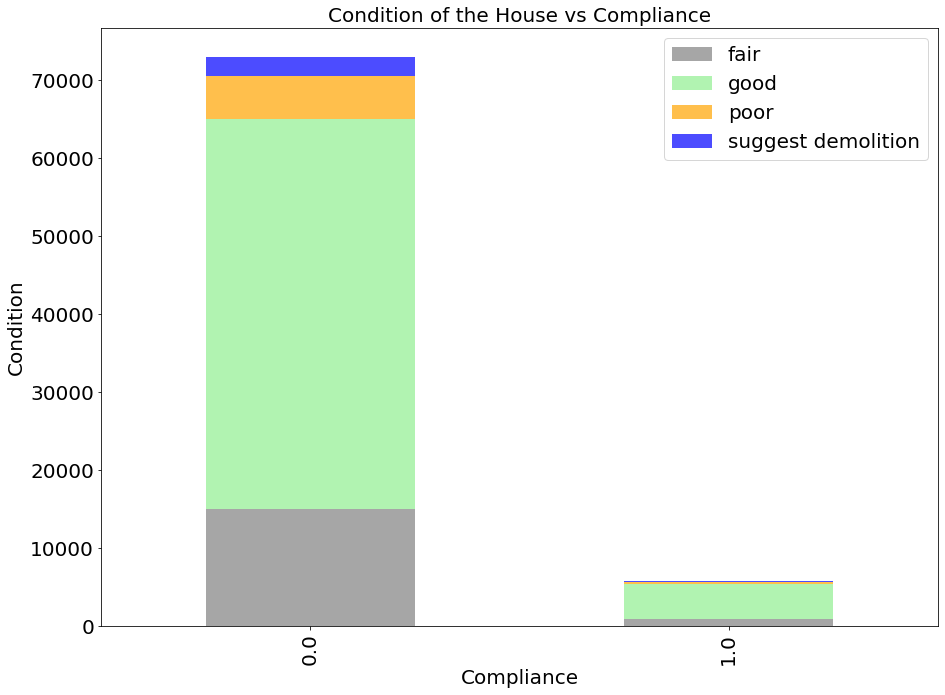

In [105]:
#print(df.groupby(['compliance','Condition']).compliance.count().unstack())

#Condition class visualization
Condition_class = df.groupby(['compliance','Condition']).compliance.count().unstack()
p1 = Condition_class.plot(kind = 'bar', stacked = True, 
                          color = ['grey','lightgreen','orange','blue'], alpha = .70,
                          figsize=[15,11],
                         fontsize=20)
p1.set_xlabel('Compliance',fontsize=20)
p1.set_ylabel('Condition',fontsize=20)
plt.title('Condition of the House vs Compliance',fontsize=20)
plt.legend(['fair','good','poor','suggest demolition'],fontsize=20)
#plt.savefig('../../nyc_mhtn_ds_Project_3/images/Condition_compliance.png')
plt.show()

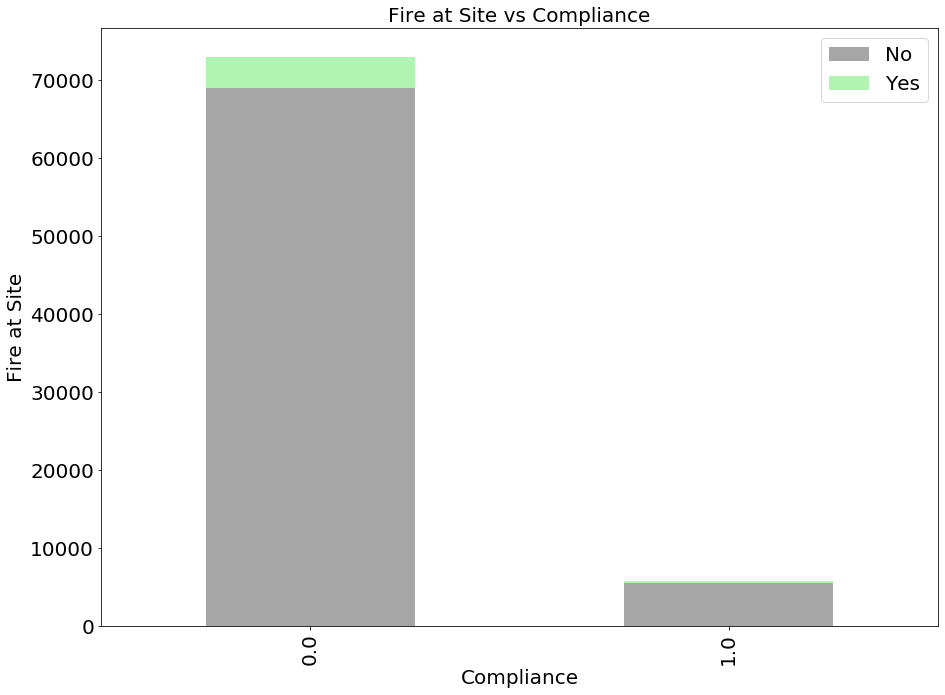

In [106]:
#print(df.groupby(['compliance','Fire']).Fire.count().unstack())

#Fire class visualization
Fire_class = df.groupby(['compliance','Fire']).compliance.count().unstack()
p1 = Fire_class.plot(kind = 'bar', stacked = True, 
                   color = ['grey','lightgreen',], alpha = .70, 
                     figsize=[15,11],
                    fontsize=20)
p1.set_xlabel('Compliance',fontsize=20)
p1.set_ylabel('Fire at Site',fontsize=20)
plt.title('Fire at Site vs Compliance',fontsize=20)
plt.legend(['No','Yes'],fontsize=20)
#plt.savefig('../../nyc_mhtn_ds_Project_3/images/Fire_Compliance.png')
plt.show()

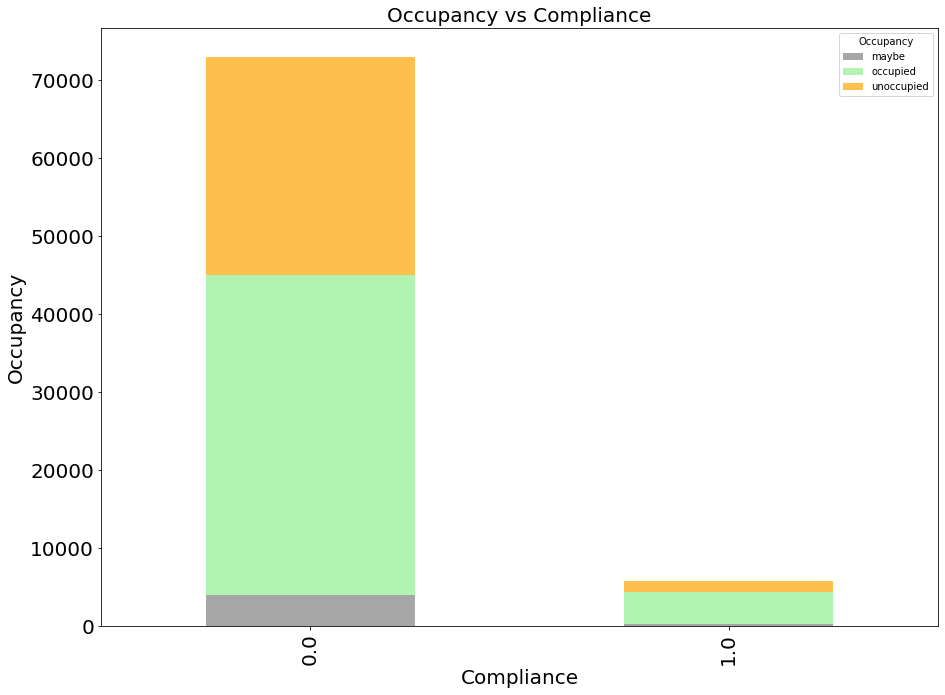

In [107]:
#print(df.groupby(['compliance','Occupancy']).compliance.count().unstack())

#Condition class visualization
Occupancy_class = df.groupby(['compliance','Occupancy']).compliance.count().unstack()
p1 = Occupancy_class.plot(kind = 'bar', stacked = True, 
                   color = ['grey','lightgreen','orange'], alpha = .70,
                          figsize=[15,11],
                         fontsize=20)
p1.set_xlabel('Compliance',fontsize=20)
p1.set_ylabel('Occupancy',fontsize=20)
plt.title( 'Occupancy vs Compliance',fontsize=20)
#plt.savefig('../../nyc_mhtn_ds_Project_3/images/Occupancy_vs_compliance.png')
plt.show()

In [108]:
c_0 = df[df['compliance'] == 0]
c_1 = df[df['compliance'] == 1]
jd = c_0.judgment_amount.value_counts()
cm = c_1.judgment_amount.value_counts()
#print(jd)
#print(cm)

Text(0.5, 0.98, 'TIckets and Amount Owed When Non-Compliant')

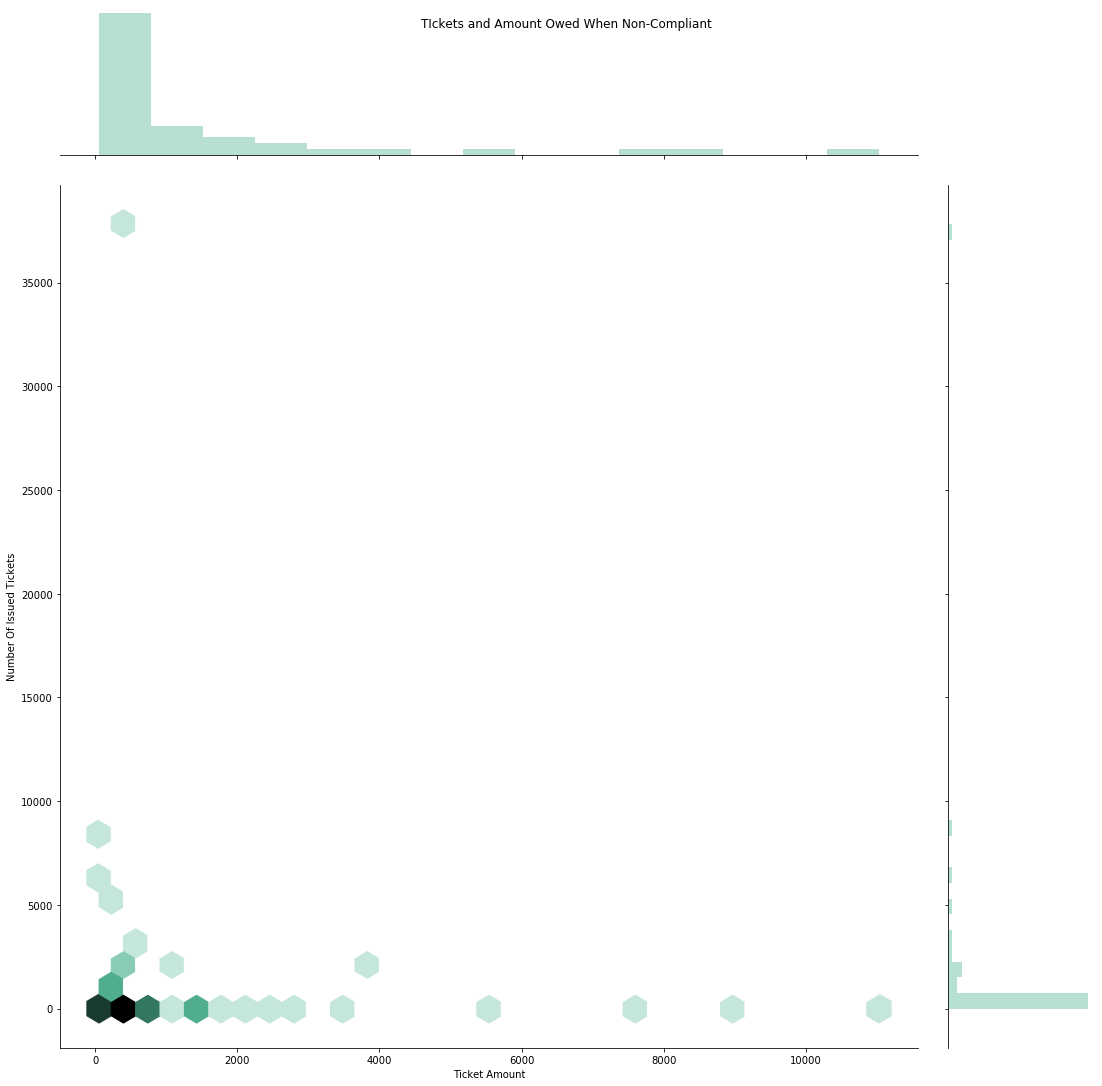

In [109]:
s = sns.jointplot(x=jd.index, y=jd.values, kind="hex", color="#4CB391",height=15)
s.set_axis_labels(xlabel="Ticket Amount",ylabel='Number Of Issued Tickets')
s.fig.suptitle('TIckets and Amount Owed When Non-Compliant')
#s.savefig('../../nyc_mhtn_ds_Project_3/images/Number_tickets_non_compliant.png')

Text(0.5, 0.98, 'TIckets and Amount Owed When Compliant')

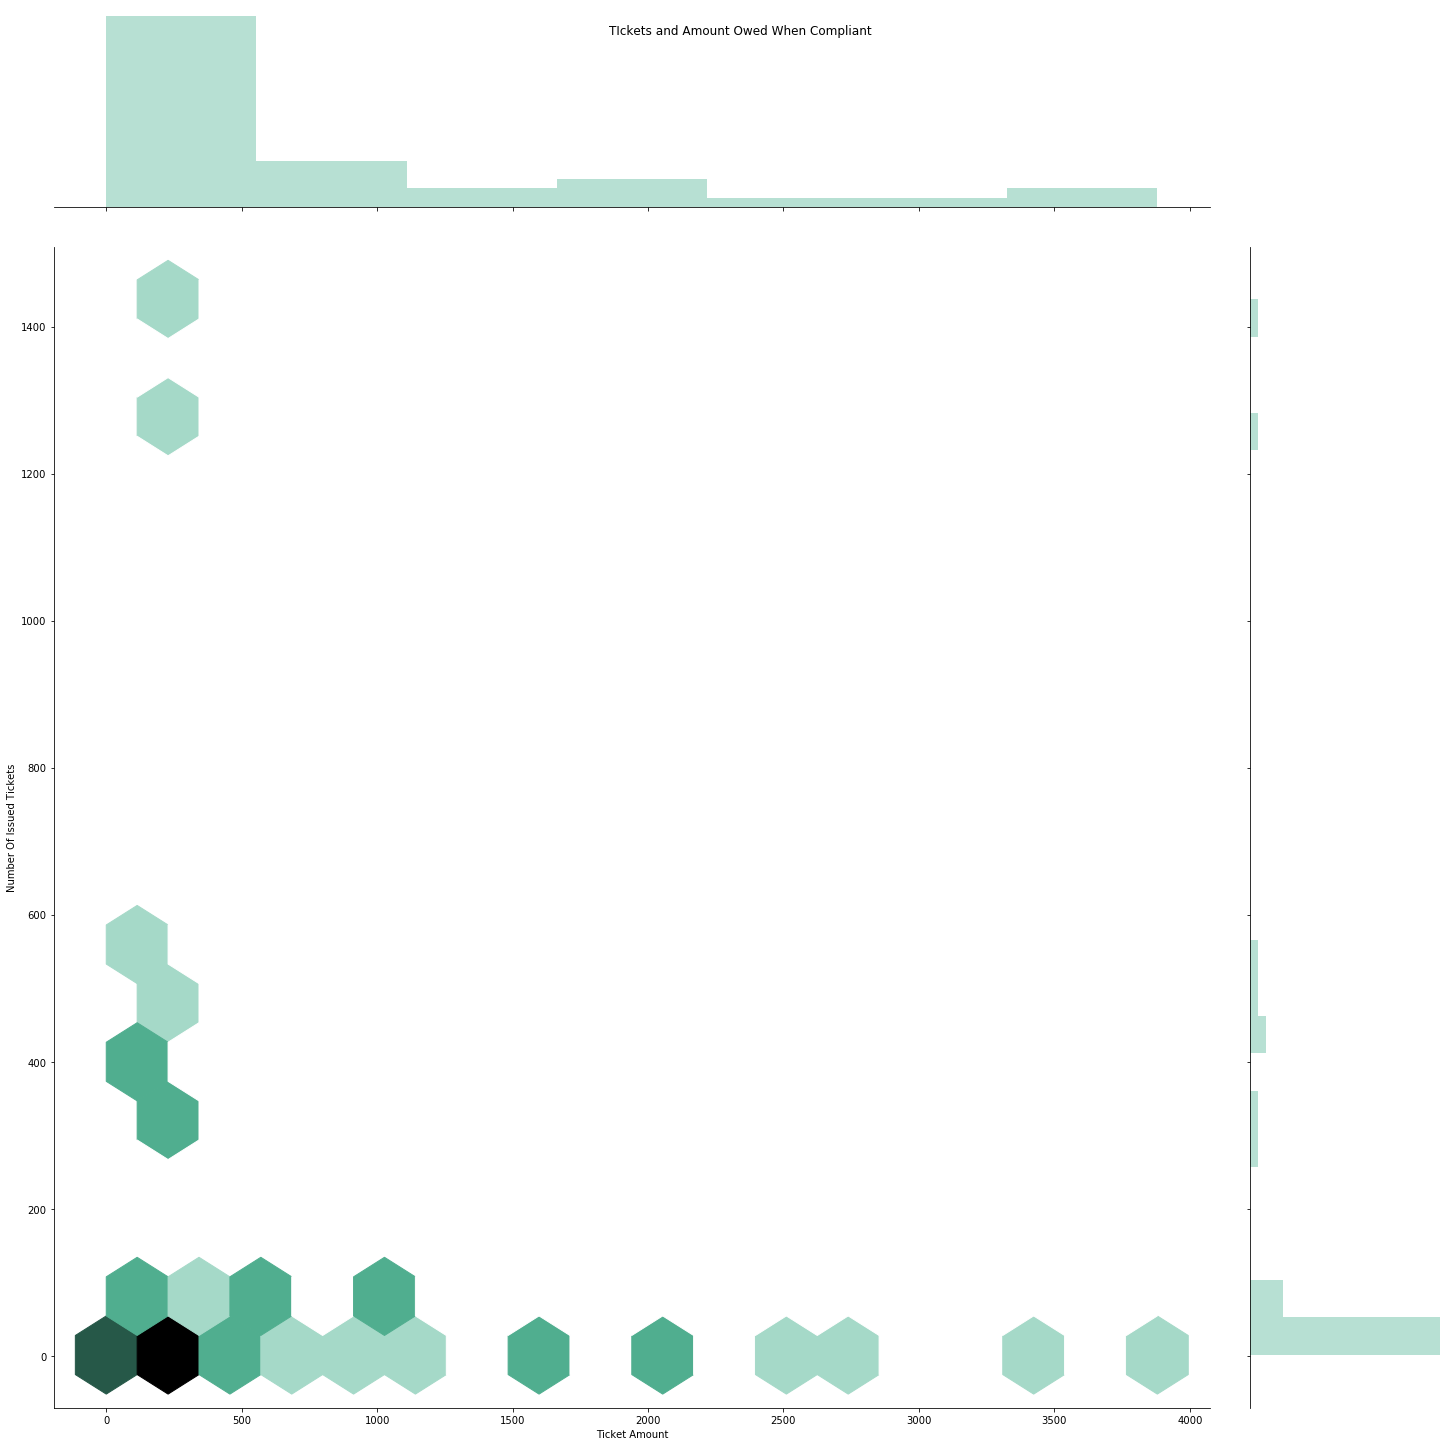

In [110]:

b = sns.jointplot(x=cm.index, y=cm.values, kind="hex", color="#4CB391",height=20)
b.set_axis_labels(xlabel="Ticket Amount",ylabel='Number Of Issued Tickets')
b.fig.suptitle('TIckets and Amount Owed When Compliant')
#b.savefig('../../nyc_mhtn_ds_Project_3/images/Number_tickets_compliant.png')